In [1]:
import os

if os.path.isdir("../notebooks/"):
    os.chdir("..")

In [2]:
import json
import random
import itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gensim.models as gm
from tqdm import tqdm
from gensim.models import KeyedVectors
import seaborn as sns

from badseeds import replicate_fig2
from badseeds import utils, seedbank, metrics


In [3]:
# path to config json file containing paths to datasets. change if necessary
CONFIG_PATH = "./config.json"

In [4]:
with open(CONFIG_PATH, "r") as f:
    config = json.load(f)

In [5]:
# for replicability
np.random.seed(42)
random.seed(42)

## Models and Data

### Models

In [6]:
datasets = []

filenames = [
    "goodreads_r_subpath",
    "goodreads_hb_subpath",
]

for f in filenames:
    models = []
    direct = os.fsencode(
        os.path.join(config["models"]["dir_path"], config["models"][f]["0"])
    )

    for filename in os.listdir(direct):
        f = os.path.join(direct, filename)

        # checking if it is a file
        if os.path.isfile(f):
            f = os.fsdecode(f)
            if ".npy" not in f:
                models.append(KeyedVectors.load(f))

    datasets.append(models)

## Seeds

In [7]:
seeds = seedbank.seedbanking(config["seeds"]["dir_path"] + "seeds.json", index = True)


# seed_sets = [
#     "black-Manzini_et_al_2019",
#     "black_roles-Manzini_et_al_2019",
#     "black-Kozlowski_et_al_2019",
#     "black-Rudinger_et_al_2017",
#     # "female_definition_words_2-Zhao_et_al_2018",
#     # "female_stereotype_words-Zhao_et_al_2018",
# ]

seed_sets = [
    "female-Kozlowski_et_al_2019",
    "female_1-Caliskan_et_al_2017",
    "definitional_female-Bolukbasi_et_al_2016",
    "female_singular-Hoyle_et_al_2019",
    "female_definition_words_2-Zhao_et_al_2018",
    "female_stereotype_words-Zhao_et_al_2018",
]

extracted_seeds = [seeds.loc[seed_set]['Seeds'] for seed_set in seed_sets]

## Function call 

In [8]:
similarity = replicate_fig2.figure_2(extracted_seeds, datasets)

In [9]:
for sim in similarity:
        for i, j in zip(extracted_seeds, sim):
            print(i, "\n")
            print(j, "\n \n")

['woman', 'women', 'she', 'her', 'her', 'hers', 'girl', 'girls', 'female', 'feminine'] 

[-0.13813278 -0.11939491 -0.2656349  -0.28680376 -0.28680376 -0.13508633
 -0.0365875  -0.00974898 -0.06678959 -0.04286194] 
 

['sister', 'female', 'woman', 'girl', 'daughter', 'she', 'hers', 'her'] 

[-0.15765141 -0.06678959 -0.13813278 -0.0365875  -0.13984208 -0.2656349
 -0.13508633 -0.28680376] 
 

['woman', 'girl', 'she', 'mother', 'daughter', 'gal', 'female', 'her', 'herself', 'Mary'] 

[-0.13813278 -0.0365875  -0.2656349  -0.27437199 -0.13984208  0.10805444
 -0.06678959 -0.28680376 -0.21658998] 
 

['woman', 'girl', 'mother', 'daughter', 'sister', 'wife', 'aunt', 'niece', 'empress', 'queen', 'princess', 'duchess', 'lady', 'dame', 'waitress', 'actress', 'goddess', 'policewoman', 'postwoman', 'heroine', 'witch', 'stewardess', 'she'] 

[-0.13813278 -0.0365875  -0.27437199 -0.13984208 -0.15765141 -0.16617975
 -0.14203824  0.01688611  0.1507761  -0.13322946 -0.17056708  0.03564259
 -0.11435101  0.

## Visualization

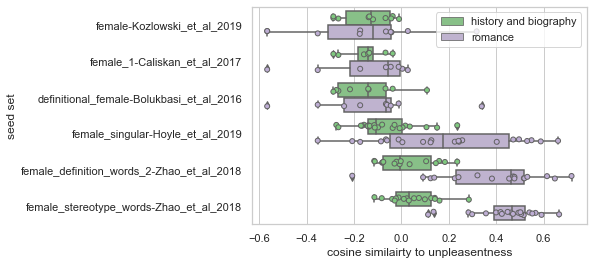

In [10]:
 df1 = pd.DataFrame(
    zip(similarity[0], seed_sets, ["history and biography"] * len(seeds)),
    columns=["cosine similarity", "seed set", "dataset"],
)
df2 = pd.DataFrame(
    zip(similarity[1], seed_sets, ["romance"] * len(seeds)),
    columns=["cosine similarity", "seed set", "dataset"],
)

df = pd.concat([df1, df2])
df = df.explode("cosine similarity")
df["cosine similarity"] = df["cosine similarity"].astype("float")

# Creating plot
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots()
ax1 = sns.boxplot(
    x="cosine similarity", y="seed set", hue="dataset", data=df, palette="Accent"
)
ax2 = sns.stripplot(
    x="cosine similarity",
    y="seed set",
    hue="dataset",
    data=df,
    jitter=True,
    palette="Accent",
    dodge=True,
    linewidth=1,
    edgecolor="gray",
)

legend = ax1.get_legend()
handles = legend.legendHandles
ax.legend(handles, ["history and biography", "romance"])
plt.xlabel('cosine similairty to unpleasentness')
# ax.set_xticklabels(['2011','2012','2013','2014','2015','2016','2017','2018'])

# show plot
plt.show()
